In [58]:
import os

import pandas as pd
import sqlite3

root_dir = os.getcwd() + "/"
sloka_root = os.path.join(root_dir, "Slokas")
print(root_dir, sloka_root)


# Ramayanam metadata
KandaList = []

KandaDetails = {'num': 1, 'name': "BalaKanda", 'sargas': 77}
KandaList.append(KandaDetails)
KandaDetails = {'num': 2, 'name': "AyodhyaKanda", 'sargas': 119}
KandaList.append(KandaDetails)
KandaDetails = {'num': 3, 'name': "AranyaKanda", 'sargas': 75}
KandaList.append(KandaDetails)
KandaDetails = {'num': 4, 'name': "KishkindaKanda", 'sargas': 67}
KandaList.append(KandaDetails)
KandaDetails = {'num': 5, 'name': "SundaraKanda", 'sargas': 68}

KandaList.append(KandaDetails)

ImportError: No module named 'nltk'

In [18]:
# Create Sqlite database
database = root_dir + "ramayanam.db"
print(database)

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

/Users/nmudivar/go/src/github.com/naren-m/ramayanam/ramayanam.db


In [19]:
conn = create_connection(database)

with conn:
    df = pd.read_sql("select * from slokas", conn)

In [20]:
df = df.drop(["meaning", "sloka", "index"], axis=1)
df.head()

,kanda_id,sarga_id,sloka_id,translation
0,1,1,1,"Ascetic Valmiki enquired of Narada, preeminent..."
1,1,1,2,Who in this world lives today endowed with exc...
2,1,1,3,"Who is that one gifted with good conduct, give..."
3,1,1,4,Who (among men) is selfrestrained? Who has con...
4,1,1,5,"O Maharshi, I intend to hear about such a man..."


In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import matplotlib as mpl

# Just making the plots look better
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12

In [25]:
def label_race (row):
    if row['kanda_id'] == 1 :
        return 'Balakanda'
    if row['kanda_id'] == 2 :
        return 'Ayodhyakanda'
    if row['kanda_id'] == 3:
        return 'Aranyakanda'
    if row['kanda_id']  == 4:
        return 'Kishkindakanda'
    return 'Sundarakanda'

df["kanda_name"] = df.apply (lambda row: label_race (row),axis=1)

In [28]:
df.tail()

,kanda_id,sarga_id,sloka_id,translation,kanda_name
13097,5,68,24,"'O noble lady the lions among men, Rama and La...",Sundarakanda
13098,5,68,25,"'You will see the lionlike Rama, a slayer of e...",Sundarakanda
13099,5,68,26,'You will hear before long the shouts of gener...,Sundarakanda
13100,5,68,27,"'You will soon see Rama, the slayer of enemies...",Sundarakanda
13101,5,68,28,Sita though afflicted heard from me that you w...,Sundarakanda


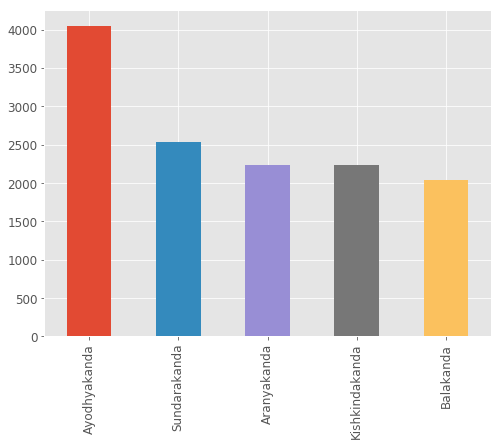

In [30]:
# Number of sloka translations vs kanda
df['kanda_name'].value_counts().plot.bar()

In [38]:
df['words'] =  df.translation.str.strip().str.split('[\W_+]')

df.head()

,kanda_id,sarga_id,sloka_id,translation,kanda_name,words
0,1,1,1,"Ascetic Valmiki enquired of Narada, preeminent...",Balakanda,"[Ascetic, Valmiki, enquired, of, Narada, , pre..."
1,1,1,2,Who in this world lives today endowed with exc...,Balakanda,"[Who, in, this, world, lives, today, endowed, ..."
2,1,1,3,"Who is that one gifted with good conduct, give...",Balakanda,"[Who, is, that, one, gifted, with, good, condu..."
3,1,1,4,Who (among men) is selfrestrained? Who has con...,Balakanda,"[Who, , among, men, , is, selfrestrained, , Wh..."
4,1,1,5,"O Maharshi, I intend to hear about such a man...",Balakanda,"[O, Maharshi, , I, intend, to, hear, about, su..."


In [41]:
rows = list()

for row in df[['kanda_name', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.kanda_name, word))
        
words = pd.DataFrame(rows, columns=['kanda', 'word'])
words.head()

TypeError: 'NoneType' object is not iterable

In [49]:
for row in df[['kanda_name', 'words']].iterrows():
    r = row[1]
    print(r.words)
    if r.words is None:
        continue
    for word in r.words:
        rows.append((r.kanda_name, word))

['Ascetic', 'Valmiki', 'enquired', 'of', 'Narada', '', 'preeminent', 'among', 'the', 'sages', 'ever', 'engaged', 'in', 'the', 'practice', 'of', 'religious', 'austerities', 'or', 'study', 'of', 'the', 'Vedas', 'and', 'best', 'among', 'the', 'eloquent', '']
['Who', 'in', 'this', 'world', 'lives', 'today', 'endowed', 'with', 'excellent', 'qualities', '', 'prowess', '', 'righteousness', '', 'gratitude', '', 'truthfulness', 'and', 'firmness', 'in', 'his', 'vows', '']
['Who', 'is', 'that', 'one', 'gifted', 'with', 'good', 'conduct', '', 'given', 'to', 'the', 'wellbeing', 'of', 'all', 'living', 'creatures', '', 'learned', 'in', 'the', 'lore', '', 'knowledge', 'of', 'all', 'things', 'that', 'is', 'known', '', '', 'capable', 'of', 'doing', 'things', 'which', 'others', 'can', 'not', 'do', 'and', 'singularly', 'handsome', '']
['Who', '', 'among', 'men', '', 'is', 'selfrestrained', '', 'Who', 'has', 'conquered', 'anger', '', 'Who', 'is', 'endowed', 'with', 'brilliance', 'and', 'free', 'from', 'env

['Having', 'heard', 'the', 'words', 'of', 'Vasishta', '', 'Sumantra', 'speedily', 'despatched', 'virtuous', 'and', 'auspicious', 'emissaries', 'to', 'bring', 'the', 'kings', '']
['In', 'accordance', 'with', 'the', 'ascetic', 's', 'order', '', 'righteous', 'Sumantra', 'himself', 'quickly', 'set', 'out', 'to', 'escort', 'Janaka', 'and', 'other', 'kings', '']
['All', 'the', 'workers', 'reported', 'to', 'the', 'wise', 'sage', '', 'Vasishta', 'about', 'the', 'tasks', 'completed', 'for', 'the', 'sacrifice', '']
['Then', '', 'well', 'pleased', '', 'the', 'best', 'among', 'brahmins', '', 'Vasishta', '', 'said', 'to', 'them', 'all', 'Nobody', 'should', 'be', 'offered', 'any', 'thing', 'with', 'disregard', '', 'Anything', 'given', 'with', 'contempt', 'undoubtedly', '', 'results', 'in', 'the', 'destruction', 'of', 'the', 'donor', '']
['Meanwhile', 'kings', 'from', 'several', 'countries', 'to', 'travelling', 'nights', 'and', 'days', 'arrived', 'bringing', 'with', 'them', 'various', 'kinds', 'of', 

['O', 'Rama', 'so', 'saying', 'to', 'king', 'Kusanabha', '', 'Kusa', 'left', 'through', 'space', 'for', 'the', 'eternal', '', '', 'Brahmaloka', '']
['After', 'some', 'time', '', 'a', 'supremely', 'righteous', 'son', 'by', 'name', 'Gadhi', 'was', 'born', 'to', 'the', 'sagacious', 'Kusanabha', '']
['O', 'son', 'of', 'Raghu', 's', 'dynasty', 'the', 'highly', 'virtuous', 'Gadhi', 'is', 'my', 'father', '', 'I', 'am', 'known', 'as', 'Kausika', 'being', 'born', 'in', 'the', 'family', 'of', 'Kusa', '']
['O', 'Raghava', 'adherent', 'of', 'best', 'religious', 'practices', '', 'is', 'my', 'elder', 'sister', 'well', 'known', 'by', 'name', 'Satyavati', '', 'She', 'was', 'bestowed', 'in', 'marriage', 'to', 'Richika', '']
['Following', 'her', 'husband', 'my', 'highly', 'generous', 'sister', 'reached', 'heaven', 'with', 'her', 'human', 'body', 'and', 'down', 'assuming', 'the', 'form', 'of', 'a', 'sacred', 'river', '', 'flowed', 'Kausiki', '']
['Conferring', 'the', 'benefit', 'of', 'the', 'other', 'wor

['O', 'Best', 'among', 'men', 'you', 'have', 'fulfilled', 'that', 'vow', '', 'You', 'have', 'achieved', 'supreme', 'renown', 'and', 'reverence', 'in', 'this', 'world', '']
['O', 'Destroyer', 'of', 'enemies', 'by', 'bringing', 'about', 'the', 'descent', 'of', 'Ganga', '', 'you', 'have', 'secured', 'a', 'great', 'abode', 'in', 'dharma', '']
['O', 'Best', 'among', 'men', 'O', 'Tiger', 'among', 'men', 'take', 'a', 'dip', 'in', 'the', 'eternally', 'sacred', 'waters', '', '', 'purify', 'yourself', 'and', 'acquire', 'holiness', '']
['O', 'King', 'perform', 'the', 'rites', 'of', 'all', 'your', 'forefathers', 'with', 'the', 'waters', '', 'of', 'Ganga', '', '', 'farewell', '', 'I', 'shall', 'return', 'to', 'my', 'world', '', 'now', '', '', 'Go', 'back', '', 'O', 'King', '', 'said', 'Grandsire', '']
['The', 'illustrious', 'rajarshi', 'Bhagiratha', '', 'performed', 'the', 'rites', 'of', 'offering', 'the', 'sacred', 'water', 'of', 'Ganga', '', 'in', 'accordance', 'with', 'proper', 'order', 'and', '

['O', 'Tiger', 'among', 'men', '', 'Rama', '', 'thereafter', 'great', 'Viswamitra', 'seeing', 'the', 'departing', 'sages', 'of', 'the', 'forest', 'said', '']
None
['O', 'Highsouled', 'sages', '', 'there', 'is', 'lake', 'Pushkara', 'in', 'the', 'vast', 'western', 'region', '', 'There', 'in', 'the', 'forest', 'fit', 'for', 'austerities', 'we', 'shall', 'practise', 'penance', 'peacefully', '']
['With', 'this', 'the', 'most', 'powerful', 'sage', 'Viswamitra', 'reached', 'Pushkara', 'where', 'living', 'on', 'fruits', 'and', 'roots', '', 'he', 'carried', 'out', 'intense', '', 'unsurpassable', '', '', 'austerities', '']
['At', 'this', 'time', 'Ambarisha', '', 'a', 'wellknown', 'king', 'of', 'Ayodhya', '', 'launched', 'preparations', 'for', 'a', '', 'sacrifice', '']
['While', 'he', 'was', 'performing', 'the', 'sacrifice', 'Indra', 'stole', 'away', 'the', 'sacrificial', 'animal', '', 'The', 'animal', 'could', 'not', 'be', 'traced', '', 'Hence', 'the', 'priest', 'said', 'to', 'the', 'king', '']


['Dasaratha', 's', 'sons', '', '', 'Rama', 'and', 'Lakshmana', '', '', 'kshatriyas', 'renowned', 'in', 'the', 'world', 'are', 'eager', 'to', 'see', 'that', 'great', 'bow', 'in', 'your', 'possession', '']
['Be', 'blessed', '', 'Show', 'this', 'great', 'bow', 'to', 'the', 'princes', '', 'This', 'is', 'their', 'desire', '', 'Once', 'it', 'is', 'fulfilled', '', 'they', 'will', 'go', 'back', '']
['Thus', 'addressed', 'by', 'the', 'mighty', 'ascetic', 'Janaka', 'replied', '', 'I', 'shall', 'tell', 'you', 'how', 'this', 'bow', 'came', 'to', 'be', 'deposited', 'here', '']
['O', 'Adorable', 'one', 'there', 'was', 'a', 'famous', 'king', 'named', 'Devarata', '', 'sixth', 'in', 'line', 'from', 'Nimi', '', 'This', 'bow', 'was', 'kept', 'with', 'him', 'in', 'trust', 'by', 'the', 'exalted', 'lord', '', 'Shiva', '', '']
['Earlier', 'at', 'the', 'time', 'of', 'destruction', 'of', 'Daksha', 's', 'sacrifice', '', 'Rudra', 'endowed', 'with', '', 'great', 'prowess', 'lifted', 'this', 'bow', 'sportively', '

['Lord', 'of', 'men', '', 'king', 'Dasaratha', '', 'addressed', 'the', 'feudatory', 'kings', 'with', 'words', 'deep', '', 'resonant', '', 'loud', 'like', 'the', 'kettledrum', 'or', 'the', 'rumbling', 'cloud', '', 'in', 'a', 'delightful', '', 'incomparable', 'and', 'attractive', 'voice', 'that', 'carried', 'all', 'the', 'dignity', 'of', 'royalty', '']
['It', 'is', 'wellknown', 'to', 'all', 'of', 'you', 'that', 'people', 'of', 'this', 'greatest', 'kingdom', 'were', 'ruled', 'by', 'my', 'predecessors', 'who', 'were', 'great', 'kings', '', 'who', 'looked', 'after', 'the', 'subjects', 'as', 'though', 'they', 'were', 'their', 'own', 'children', '']
['I', 'desire', 'to', '', 'accomplish', 'the', 'welfare', 'of', 'this', 'entire', 'world', 'which', 'deserves', 'the', 'happiness', 'brought', 'about', 'by', 'the', 'rule', 'of', 'all', 'the', 'Ikshvaku', 'kings', '']
['Following', 'the', 'path', 'of', 'my', 'forefathers', 'I', 'protected', 'the', 'people', 'to', 'the', 'best', 'of', 'my', 'abilit

['O', 'my', 'son', 'my', 'devotion', 'to', 'the', 'lotuseyed', 'Visnu', '', 'enduring', 'the', 'pain', '', 'of', 'observance', 'of', 'vows', 'and', 'fasting', '', 'have', 'not', 'gone', 'in', 'vain', 'The', 'royal', 'fortune', 'of', 'the', 'Ikshvakus', 'will', 'pass', 'on', 'to', '', 'you', '', 'What', 'a', 'joy']
['Thus', 'spoken', 'to', 'by', 'his', 'mother', '', 'Rama', 'looked', 'at', 'his', 'brother', 'Lakshmana', 'sitting', 'humbly', 'with', 'folded', 'palms', 'and', 'with', 'a', 'smile', 'said', 'to', 'him', '']
['O', 'Lakshmana', 'rule', 'this', 'earth', 'together', 'with', 'me', '', 'This', 'royal', 'fortune', 'also', 'accrues', 'to', 'you', '', 'for', 'you', 'are', 'my', 'second', 'innermost', 'self', '']
['O', '', 'son', 'of', 'Sumitra', '', 'enjoy', 'all', 'pleasures', 'you', 'wish', 'and', 'the', 'fruits', 'of', 'royalty', '', 'I', 'desire', '', 'this', 'life', 'and', 'kingdom', 'for', 'your', 'sake', 'only', '']
['After', 'speaking', 'to', 'Lakshmana', '', 'Rama', 'made',

['O', 'great', 'king', 'you', 'used', 'to', 'boast', 'that', 'you', 'always', 'speak', 'the', 'truth', 'and', 'are', 'steadfast', 'in', 'your', 'vows', '', 'Why', 'are', 'you', 'now', 'seeking', 'to', 'avoid', 'granting', 'me', 'this', 'boon', '']
['Thus', 'addressed', 'by', 'Kaikeyi', '', 'king', 'Dasaratha', 'flew', 'into', 'a', 'temper', 'for', 'a', 'while', '', 'and', 'then', 'as', 'if', 'in', 'a', 'state', 'of', 'delirium', '', 'replied', '']
['Alas', 'O', 'ignoble', 'woman', '', 'my', 'enemy', '', 'your', 'desire', 'would', 'be', 'fulfilled', 'after', 'Rama', '', 'the', 'foremost', 'among', 'men', 'is', 'exiled', 'and', 'I', 'am', 'dead', '', 'You', 'will', 'be', 'happy', 'thereafter']
['Even', 'in', 'heaven', 'when', 'the', 'gods', 'enquire', 'about', 'the', 'welfare', 'of', 'Rama', 'how', 'will', 'I', 'convince', 'them', 'about', 'his', 'banishment', 'repudiating', 'the', 'fact', '', 'What', 'a', 'catastrophe']
['If', 'I', 'tell', 'the', 'truth', '', '', 'To', 'please', 'Kaikey

['Maharaja', '', 'Dasaratha', '', 'with', 'his', 'senses', 'dulled', 'had', 'become', 'emaciated', 'due', 'to', 'sorrow', 'and', 'suffering', '', 'With', 'an', 'agitated', 'and', 'troubled', 'mind', '', 'he', 'was', 'breathing', 'heavily', '', 'Although', 'unshakable', '', 'he', 'looked', 'agitated', 'like', 'an', 'ocean', 'with', 'successive', 'rows', 'of', 'waves', '', 'like', '', 'the', '', 'Sun', 'in', 'eclipse', '', 'like', 'an', 'ascetic', 'who', 'has', 'uttered', 'falsehood', '']
['The', 'more', 'Rama', 'reflected', 'on', 'the', 'incomprehensible', 'sorrow', 'of', 'the', 'king', '', 'the', 'more', 'he', 'became', 'perturbed', 'like', 'an', 'ocean', 'on', 'the', 'new', 'Moon', 'day', '']
['Devoted', 'to', 'his', 'father', 's', 'wellbeing', '', 'Rama', 'reflected', '', 'Why', 'does', 'not', 'father', 'reciprocate', 'my', 'greeting', '', 'like', 'on', 'other', 'days', '', '']
['On', 'other', 'occasions', 'even', 'though', 'angry', 'he', 'would', 'feel', 'pleased', '', 'But', 'today

['Born', 'in', 'a', 'noble', 'race', '', 'O', 'Sita', '', 'you', 'are', 'always', 'devoted', 'to', 'duty', '', 'Follow', 'your', 'duty', '', 'here', '', 'It', 'will', 'make', 'me', 'happy', '']
['Do', 'as', 'I', 'tell', 'you', '', 'O', 'delicate', 'Sita', '', 'There', 'are', '', 'indeed', '', 'many', 'hardships', 'in', 'the', 'forest', '', 'I', 'shall', 'tell', 'you', 'all', 'about', 'them', '', 'Listen', 'to', 'me', '']
['Give', 'up', 'the', 'desire', 'to', 'live', 'in', 'the', 'forest', '', 'O', 'Sita', 'Living', 'in', 'the', 'dreary', 'jungle', '', 'it', 'is', 'said', '', 'has', 'many', 'hardships', '']
['I', 'am', 'saying', 'all', 'this', 'in', 'your', 'interest', '', 'The', 'forest', 'is', 'a', 'haven', 'of', 'hardships', '', 'I', 'know', 'of', 'no', 'happiness', 'in', 'the', 'forest', '']
['It', 'is', 'frightening', 'to', 'hear', 'the', 'sounds', 'of', '', 'waterfalls', 'and', 'the', 'roar', 'of', 'lions', 'living', 'in', 'the', 'mountain', 'caves', '', 'Therefore', 'forest', 'li

['Be', 'blessed', 'audience', 'may', 'be', 'granted', 'to', 'Rama', 'who', 'possesses', 'proven', 'prowess', '', 'and', 'now', 'waits', '', 'after', 'taking', 'leave', 'of', 'his', 'friends', '', 'to', 'see', 'you', '']
['O', 'Lord', 'of', 'the', 'world', 'behold', 'him', 'embellished', 'with', 'all', 'princely', 'virtues', 'like', 'the', 'Sun', 'encircled', 'with', 'its', 'rays', '', '', 'now', '', 'leaving', 'for', 'the', 'forest', '']
['That', 'truthful', 'and', 'virtuous', 'king', '', 'Dasaratha', '', 'who', 'was', 'deep', 'like', 'the', 'ocean', 'and', 'free', 'from', 'mud', '', 'pure', '', 'like', 'the', '', 'sky', 'replied', '']
['O', 'Sumantra', 'bring', 'all', 'my', 'consorts', 'who', 'are', 'here', '', 'In', 'the', 'company', 'of', 'all', 'my', 'wives', '', 'I', 'desire', 'to', 'give', 'audience', 'to', 'virtuous', 'Rama', '']
['O', 'venerable', 'ones', '', 'king', 'Dasaratha', 'summons', 'you', '', 'Go', 'there', 'without', 'delay', '', 'said', 'Sumantra', 'to', 'the', 'king

['Looking', 'at', 'the', 'people', 'with', 'love', 'as', 'if', 'they', 'were', 'his', 'own', 'children', 'and', 'as', 'though', 'drinking', 'them', 'with', 'his', 'glances', '', 'Rama', 'appealed', 'to', 'them', '']
['O', 'citizens', 'of', 'Ayodhya', 'may', 'the', 'love', 'and', 'respect', 'you', 'have', 'shown', 'to', 'please', 'me', 'be', 'bestowed', 'specially', 'on', 'Bharata']
['Bharata', '', 'enhancer', 'of', 'the', 'delight', 'of', 'Kaikeyi', '', 'possesses', 'an', 'auspicious', 'character', '', 'He', 'will', 'do', 'for', 'you', 'everything', 'appropriate', '', 'agreeable', 'and', 'beneficial', '']
['Though', 'tender', 'in', 'age', 'Bharata', 'is', 'mature', 'in', 'intellect', '', 'Gentle', '', 'valiant', 'and', 'virtuous', '', 'he', 'will', 'dispel', 'all', 'your', 'fears', 'and', 'act', 'as', 'a', 'true', 'protector', '']
['Endowed', 'with', 'kingly', 'qualities', '', 'he', 'is', 'recognised', 'as', 'heirapparent', '', 'Therefore', '', 'as', 'I', 'did', '', 'all', 'of', '', 'y

['After', 'spending', 'the', 'night', '', 'the', 'princes', '', 'destroyers', 'of', 'enemies', '', 'offered', 'obeisance', 'to', 'that', 'great', 'sage', '', 'Bharadhwaja', '', 'and', 'went', 'towards', 'that', 'mount', 'Chitrkuta', '']
['Seeing', 'them', 'setting', 'forth', '', 'the', 'great', 'sage', 'blessed', 'them', 'for', 'a', 'safe', 'journey', 'and', 'followed', 'them', 'like', 'a', 'father', 'following', 'his', 'children', '']
['Then', 'that', 'great', 'effulgent', 'sage', 'Bharadwaja', 'began', 'to', 'speak', 'to', 'Rama', 'whose', 'strength', 'was', 'truth', '']
['Reaching', 'the', 'confluence', 'of', 'rivers', 'Ganga', 'and', 'Yamuna', '', 'O', 'Rama', 'and', 'Lakshmana', 'best', 'among', 'men', 'proceed', 'along', 'the', 'Kalindi', '', 'Yamuna', '', 'river', 'flowing', 'westward', '']
['On', 'reaching', 'that', 'swiftflowing', 'river', 'Yamuna', '', 'O', 'Rama', 'and', 'Lakshmana', 'O', 'scions', 'of', 'the', 'Raghu', 'race', '', 'you', 'will', 'find', 'an', 'ancient', 'sp

['Such', 'Rama', '', 'the', 'best', 'among', 'men', '', 'powerful', 'like', 'a', 'lion', '', 'with', 'eyes', 'fierce', 'like', 'that', 'of', 'a', 'bull', 'has', 'been', 'destroyed', 'by', 'his', 'own', 'father', 'just', 'as', 'the', 'big', 'fish', 'destroys', 'its', 'own', 'offsprings', '']
['You', 'have', 'banished', 'your', 'son', 'who', 'is', 'devoted', 'to', 'righteousness', '', 'Is', 'it', 'in', 'accordance', 'with', 'the', 'scriptures', 'and', 'the', 'eternal', 'tradition', 'followed', 'by', 'the', 'twiceborn', '']
['O', 'king', 'for', 'a', 'woman', 'the', 'first', 'refuge', 'is', 'the', 'husband', '', 'the', 'second', 'her', 'son', '', 'the', 'third', 'her', 'relatives', 'and', 'there', 'is', 'no', 'fourth', 'alternative', 'in', 'this', 'world', '']
['You', 'are', 'nonexistent', 'for', 'my', 'purpose', '', 'Rama', 'has', 'taken', 'refuge', 'in', 'the', 'forest', 'and', 'I', 'do', 'not', 'like', 'to', 'go', 'there', '', 'You', 'have', 'destroyed', 'me', 'in', 'all', 'possible', '

['Rama', 'did', 'not', 'rob', 'any', 'brahmin', 'of', 'even', 'a', 'little', 'wealth', 'nor', 'did', 'he', 'harm', 'any', 'innocent', 'man', '', 'whether', 'rich', 'or', 'poor', '', 'He', 'never', 'casts', 'his', 'eyes', 'on', 'another', 's', 'wife', '']
['My', 'son', '', 'I', 'on', 'hearing', 'of', 'Rama', 's', 'consecration', 'asked', 'your', 'father', 'to', 'confer', 'the', 'kingdom', 'on', 'you', 'and', 'banish', 'Rama', '']
['Your', 'father', '', 'faithful', 'to', 'his', 'word', '', 'banished', 'Rama', 'along', 'with', 'Lakshmana', 'and', 'Sita', '']
['The', 'renowned', 'ruler', 'of', 'the', 'earth', '', 'king', 'Dasaratha', '', '', 'unable', 'to', 'behold', '', 'the', 'sorry', 'state', 'of', '', 'his', 'beloved', 'son', 'and', 'stricken', 'by', 'filial', 'grief', '', 'merged', 'into', 'the', 'five', 'elements', '', 'died', '', '']
['O', 'knower', 'of', 'dharma', '', 'assume', 'kingship', 'now', '', 'It', 'is', 'only', 'for', 'your', 'sake', 'that', 'all', 'this', 'has', 'been', '

['Bharata', '', 'son', 'of', 'Kaikeyi', 'was', 'stricken', 'by', 'a', 'lofty', 'mountain', 'of', 'grief', '', 'The', 'cavityless', 'rocks', 'of', 'that', 'mountain', 'were', 'his', 'contemplation', '', 'the', 'minerals', 'were', 'his', 'sighs', '', 'the', 'multitude', 'of', 'trees', 'were', 'his', 'desolation', '', 'peaks', 'were', 'his', 'fatigue', 'and', 'mental', 'distress', '', 'the', 'unlimited', 'number', 'of', 'animals', 'were', 'his', 'stupor', '', 'the', 'bamboo', 'tree', 'was', 'his', 'sorrow', '']
['Then', 'best', 'of', 'men', '', 'Bharata', '', 'with', 'highly', 'distraught', 'mind', 'and', 'heaving', 'sighs', '', 'with', 'senses', 'bewildered', 'and', 'oppressed', 'by', 'the', 'fever', 'raging', 'in', 'his', 'heart', 'and', 'caught', 'in', 'a', 'great', 'calamity', '', 'like', 'a', 'bull', 'separated', 'from', 'the', 'herd', 'enjoyed', 'no', 'peace', 'of', 'mind', '']
['Bharata', '', 'a', 'man', 'of', 'great', 'magnanimity', '', 'joined', 'Guha', 'together', 'with', 'his',

['Twenty', 'thousand', 'women', 'adorned', 'with', 'gold', '', 'gems', 'and', 'corals', 'sent', 'by', 'Kubera', 'came', '']
['Troops', 'of', 'twenty', 'thousand', 'apsaras', 'by', 'whom', 'any', 'man', 'when', 'taken', 'hold', 'of', 'in', 'their', 'arms', 'could', 'be', 'intoxicated', 'with', 'intense', 'passion', '', 'came', 'from', 'Nandana', 'gardens', '']
['There', 'along', 'with', 'Narada', '', 'Tumburu', 'and', 'Gopa', '', 'distinguished', 'kings', 'of', 'the', 'gandharvas', '', 'looking', 'bright', 'like', 'the', 'Sun', '', 'began', 'to', 'sing', 'in', 'the', 'presence', 'of', 'Bharata', '']
['Thereafter', '', 'the', 'apsaras', '', 'Alambusa', '', 'Misrakesi', '', 'Pundarika', 'and', 'Vamana', 'danced', 'near', 'Bharata', 'at', 'the', 'command', 'of', 'Bharadwaja', '']
['The', 'garlands', 'of', 'the', 'gods', 'available', 'in', 'Chitraratha', 's', '', 'Kubera', 's', '', 'garden', 'could', 'not', 'match', 'those', 'obtained', 'under', 'the', 'orders', 'of', 'Bharadwaja', '']
['At

['All', 'the', 'brothers', '', 'having', 'consoled', 'Rama', 'as', 'best', 'they', 'could', '', 'told', 'him', '', 'Let', 'the', 'libations', 'be', 'offered', 'to', 'our', 'father', '', 'the', 'protector', 'of', 'the', 'world', '']
['On', 'hearing', 'that', 'her', 'fatherinlaw', '', 'king', 'Dasaratha', '', 'had', 'attained', 'heaven', '', 'Sita', '', 'her', 'eyes', 'filled', 'with', 'tears', 'could', 'not', 'look', 'at', 'her', 'husband', 'in', 'the', 'face', '']
['Having', 'consoled', 'Sita', '', 'daughter', 'of', 'Janaka', '', 'griefstricken', 'Rama', 'said', 'to', 'Lakshmana', 'who', 'was', 'also', 'distressed', 'with', 'grief', '']
['I', 'shall', 'go', 'and', 'offer', 'libations', 'to', 'my', 'magnanimous', 'father', '', 'Go', 'and', 'fetch', 'the', 'dried', 'pulp', 'of', 'ingudi', 'fruit', 'and', 'an', 'upper', 'garment', 'made', 'of', 'bark', '']
['Let', 'us', 'proceed', 'in', 'this', 'order', '', '', '', 'you', 'first', '', 'Sita', 'second', 'and', 'I', 'last', '', 'This', 'pro

['After', 'consecration', '', 'you', 'too', 'return', 'to', 'rule', 'Ayodhya', 'along', 'with', 'all', 'of', 'us', 'like', 'Indra', 'who', 'went', 'back', '', 'to', 'heaven', '', '', 'accompanied', 'by', 'Maruts', 'after', 'conquering', 'all', 'the', 'worlds', 'with', 'his', 'prowess', '']
['Discharging', 'completely', 'the', 'three', 'debts', '', 'to', 'gods', '', 'to', 'ancestors', 'and', 'to', 'sages', '', 'subduing', 'your', 'enemies', 'and', 'gratifying', 'your', 'friends', '', 'you', 'alone', '', 'have', 'the', 'right', '', 'to', 'dictate', 'me', '']
['O', 'my', 'esteemed', 'brother', 'let', 'all', 'your', 'friends', 'be', 'delighted', 'today', 'at', 'your', 'enthronement', 'and', 'your', 'enemies', 'flee', 'in', 'terror', 'in', 'ten', 'different', 'directions', '']
['O', 'best', 'of', 'men', '', 'wiping', 'out', 'all', 'the', 'censure', 'on', 'my', 'mother', '', 'redeem', 'our', 'revered', 'father', 'from', 'sin', '']
['I', 'beseech', 'you', 'with', 'my', 'head', 'bowed', 'low',

['', 'Both', 'these', 'sons', 'of', 'king', 'Dasaratha', 'wish', 'to', 'see', 'the', 'bow', '', 'Show', 'the', 'divine', 'bow', 'to', 'prince', '', 'Rama', '', '']
['At', 'the', 'words', 'of', 'that', 'ascetic', '', 'my', 'father', 'brought', 'out', 'the', 'bow', '', 'Mighty', 'and', 'valiant', 'Rama', 'bent', 'it', 'and', 'strung', 'it', 'and', 'drew', 'it', 'in', 'the', 'twinkling', 'of', 'an', 'eye', '']
['When', 'Rama', 'was', 'stringing', 'the', 'bow', 'with', 'force', '', 'it', 'was', 'broken', 'into', 'two', 'in', 'the', 'middle', 'and', 'fell', 'down', 'with', 'a', 'dreadful', 'sound', 'like', 'that', 'of', 'thunder', '']
['Then', '', 'my', 'father', 'steadfast', 'in', 'truth', '', 'held', 'a', 'vessel', 'of', 'pure', 'water', 'and', 'declared', 'his', 'decision', 'to', 'offer', 'me', 'to', 'Rama', '']
['Then', 'Rama', 'did', 'not', 'accept', 'the', 'offer', 'of', 'my', 'father', 'straightaway', 'before', 'he', 'knew', 'the', 'opinion', 'of', 'his', 'father', 'Dasaratha', '', '

['Thereafter', 'on', 'Rama', 's', 'query', 'Sarabhanga', 'told', 'him', 'all', 'about', 'Indra', 's', 'visit', '']
['O', 'Rama', '', 'Indra', '', 'the', 'bestower', 'of', 'boons', '', 'wants', 'to', 'take', 'me', 'to', 'the', 'world', 'of', 'Brahma', '', '', 'earned', 'by', 'me', 'through', 'severe', 'penance', 'which', 'is', 'most', 'difficult', 'to', 'be', 'attained', 'by', 'those', 'devoid', 'of', 'selfrealisation', '']
['O', 'Rama', '', 'the', 'best', 'among', 'men', 'you', 'are', 'a', 'very', 'dear', 'guest', 'to', 'me', 'and', 'knowing', 'that', 'you', 'are', 'near', '', 'I', 'will', 'not', 'go', 'to', 'the', 'world', 'of', 'Brahman', 'without', 'seeing', 'you', '']
['O', 'Rama', '', 'the', 'best', 'of', 'men', '', '', 'only', '', 'after', 'seeing', 'a', 'great', '', 'virtuous', 'soul', 'like', 'you', 'shall', 'I', 'go', 'to', 'heaven', '', 'the', 'abode', 'of', 'the', 'gods', '']
['O', 'tiger', 'among', 'men', '', 'I', 'have', 'conquered', 'heavenly', 'abodes', 'as', 'well', 'as

['He', 'is', 'not', 'with', 'his', 'wife', '', 'and', 'is', 'in', 'need', 'of', 'one', '', 'He', 'is', 'young', '', 'handsome', 'and', 'worthy', '', 'He', 'will', 'be', 'an', 'appropriate', 'husband', 'to', 'you', '']
['O', '', 'woman', 'of', 'large', 'eyes', 'and', 'fine', 'hips', '', 'my', 'brother', 'is', 'fit', 'for', 'you', '', 'You', 'will', '', 'with', 'him', '', 'shine', 'like', 'the', 'radiant', 'Sun', 'on', 'mount', 'Meru', '', 'You', 'will', 'enjoy', 'yourself', 'without', 'a', 'cowife', '', 'You', 'may', 'approach', 'him', '']
['Thus', '', 'told', 'by', 'Rama', '', 'the', 'demoness', '', 'deluded', 'with', 'lust', '', 'left', 'him', 'suddenly', '', 'and', 'said', 'to', 'Lakshmana', '']
['With', 'my', 'fine', 'complexion', '', 'I', 'will', 'be', 'a', 'suitable', 'wife', 'for', 'you', '', 'You', 'can', 'happily', 'wander', 'about', 'in', 'Dandaka', 'forest', 'with', 'me', '']
['Thus', 'addressed', 'by', 'the', 'demoness', 'Lakshmana', '', 'son', 'of', 'Sumitra', '', 'wellvers

['The', 'battalions', 'of', 'demons', 'sent', 'down', 'streams', 'of', 'arrows', 'on', 'Rama', 'just', 'like', 'clouds', '', 'downpour', 'on', 'mountains', '']
['Surrounded', 'by', 'the', 'terrible', 'demons', 'Rama', 'appeared', 'like', 'Lord', 'Siva', 'at', 'dusk', 'with', 'hosts', 'of', 'his', 'retinues', 'arounds', '']
['Rama', 'resisted', 'the', 'weapons', 'released', 'by', 'the', 'demons', 'like', 'the', 'sea', '', 'the', 'inflow', 'of', 'river', 'waters', '']
['Rama', 'remained', 'unhurt', 'like', 'a', 'great', 'mountain', 'struck', 'by', 'many', 'glowing', 'thunderbolts', '', 'He', 'felt', 'no', 'pain', 'even', 'though', 'his', 'limbs', 'were', 'hit', 'by', 'the', 'dreadful', 'weapons', '']
['Wounded', 'all', 'over', 'the', 'body', '', 'bleeding', 'through', 'the', 'wounds', 'caused', 'by', 'weapons', '', 'Rama', 'looked', 'like', 'the', 'evening', 'Sun', 'covered', 'with', 'clouds', '']
['Seeing', 'Rama', 'left', 'alone', 'surrounded', 'by', 'many', 'thousands', 'of', 'demons'

['', 'O', 'distinguished', 'sage', 'with', 'the', 'four', 'divisions', 'of', 'my', 'army', 'I', 'will', 'slay', 'the', 'enemies', 'you', 'want', 'me', 'to', '', '']
['When', '', 'the', 'king', 'thus', 'responded', 'to', 'the', 'sage', '', '', 'he', 'told', 'him', 'that', 'none', 'other', 'than', 'Rama', 'in', 'this', 'world', 'is', 'a', 'match', 'for', 'that', 'demon', '']
['', 'O', 'king', '', 'you', 'have', 'protected', 'even', 'gods', 'in', 'wars', 'and', 'have', 'been', 'a', 'guardian', '', 'Your', 'deeds', 'are', 'very', 'wellknown', 'in', 'the', 'three', 'worlds', '']
['', 'O', 'scourge', 'of', 'foes', 'as', 'you', 'wish', '', 'let', 'your', 'great', 'army', 'wait', 'here', '', 'Even', 'though', 'Rama', 'is', 'young', 'he', 'is', 'glorious', '', 'and', 'capable', 'of', 'subduing', 'the', 'enemy', '', 'I', 'will', 'take', 'him', '', 'Be', 'blessed', '', '']
['Sage', 'Visvamitra', 'saying', 'so', 'took', 'the', 'son', 'of', 'the', 'king', 'and', 'went', 'back', 'very', 'happily', '

['That', 'deer', 'with', 'hundreds', 'of', 'silver', 'spots', 'on', 'the', 'body', 'appeared', 'enchanting', 'and', 'pleasing', 'to', 'the', 'eyes', 'while', 'he', 'wandered', 'about', 'nibbling', 'the', 'tender', 'leaves', 'of', 'trees', '']
['The', 'deer', 'went', 'wandering', 'about', 'the', 'banana', 'groves', 'surrounding', 'Rama', 's', 'hermitage', 'and', 'moved', 'slowly', 'towards', 'the', 'karnikara', 'trees', 'in', 'order', 'to', 'catch', 'the', 'attention', 'of', 'Sita', '']
['That', 'magnificent', 'deer', 'glittered', 'with', 'the', 'colour', 'of', 'blue', 'lotus', 'on', 'its', 'back', '', 'wandered', 'merrily', 'in', 'the', 'vicinity', 'of', 'Rama', 's', 'hermitage', '']
['The', 'wonderful', 'deer', 'moved', 'to', 'and', 'fro', '', 'now', 'disappearing', 'and', 'now', 'swiftly', 'returning', '']
['The', 'deer', 'is', 'now', 'sporting', '', 'now', 'sitting', 'on', 'the', 'ground', '', 'now', 'standing', 'at', 'the', 'entrance', 'of', 'the', 'hermitage', 'and', 'now', 'runni

['SIta', 'who', 'had', 'put', 'on', 'pure', 'gold', 'ornaments', 'on', 'her', 'body', 'and', 'who', 'was', 'clad', 'in', 'yellow', 'silk', '', 'shone', 'like', 'lightning', '']
['Ravana', 'was', 'shining', 'all', 'the', 'more', 'with', 'her', '', 'yellow', 'clothes', 'blowing', 'in', 'the', 'air', '', 'and', 'looked', 'like', 'a', 'mountain', 'shining', 'with', 'fire', 'burning', 'around', '']
['The', 'red', 'lotus', 'petals', 'worn', 'by', 'the', 'most', 'auspicious', 'Sita', '', 'princess', 'of', 'Videha', '', 'were', 'showered', 'on', 'Ravana', '']
['As', 'the', 'goldencoloured', 'garment', 'worn', 'by', 'Sita', 'blew', 'in', 'the', 'wind', '', 'it', 'looked', 'like', 'a', 'coppercoloured', 'cloud', 'illumined', 'by', 'the', 'evening', 'Sun', 'in', 'the', 'sky', '']
['Sita', 's', 'face', 'with', 'her', 'beautiful', 'nose', 'on', 'Ravana', 's', 'lap', 'and', 'not', 'on', 'Rama', 's', '', 'shone', 'no', 'more', 'like', 'a', 'lotus', 'without', 'its', 'stalk', '']
['Sita', 's', 'face',

['', 'The', 'way', 'the', 'jackal', 'is', 'howling', 'appears', 'ominous', '', 'May', 'Sita', 'be', 'safe', 'without', 'being', 'eaten', 'up', 'by', 'demons']
['', 'If', '', 'Lakshmana', 'listens', 'to', 'Maricha', 'imitating', 'my', 'voice', 'in', 'the', 'form', 'of', 'a', 'deer', '', 'he', '', 'sent', 'by', 'Sita', 'will', 'come', 'for', 'me', 'at', 'once', '', 'leaving', 'her', 'behind', '']
['', 'Hence', 'the', 'murder', 'of', 'Sita', 'must', 'have', 'been', 'jointly', 'planned', 'by', 'the', 'demons', '', 'Maricha', 'who', 'had', 'assumed', 'the', 'form', 'of', 'a', 'golden', 'deer', '', 'took', 'me', 'away', 'from', 'the', 'hermitage', 'to', 'a', 'faroff', 'place', 'where', '', 'killed', 'by', 'my', 'arrows', '', 'he', 'turned', 'a', 'demon', 'uttering', 'the', 'words', '', 'Alas', '', 'Lakshmana', '', 'I', 'am', 'killed', '']
['', 'On', 'account', 'of', 'living', 'in', 'this', 'dense', 'forest', 'in', 'Janasthana', 'I', 'have', 'earned', 'enmity', 'with', 'the', 'demons', '', 'W

['O', 'longarmed', '', 'mighty', 'and', 'powerful', 'Rama', 'in', 'the', 'past', 'I', 'was', 'handsome', 'like', 'the', 'Moon', 'or', 'Indra', 'or', 'the', 'Sun', 'inconceivable', 'to', 'all', 'the', 'three', 'worlds', '']
['With', 'my', 'appearance', '', 'I', 'was', 'a', 'great', 'nuisance', 'to', 'the', 'world', 'and', 'used', 'to', 'terrorise', 'the', 'sages', 'living', 'in', 'the', 'forest', '']
['With', 'my', 'appearance', 'I', 'invited', 'the', 'wrath', 'of', 'Sthulasira', 'who', 'I', 'assaulted', 'among', 'the', 'many', 'seers', '', 'while', 'he', 'was', 'collecting', 'food', 'in', 'the', 'forest', '']
['Seeing', 'me', 'he', 'pronounced', 'a', 'dreadful', 'curse', 'on', 'me', 'saying', '', '', 'You', 'will', 'get', 'a', 'cruel', '', 'despicable', 'form', '', '']
['When', 'I', 'sought', 'to', 'know', 'how', 'the', 'curse', 'angrily', 'pronounced', 'on', 'me', 'would', 'come', 'to', 'an', 'end', '', 'he', 'said', '']
['', 'When', 'Rama', 'gets', 'your', 'arms', 'in', 'a', 'desolat

['O', 'ascetic', '', '', 'hope', 'you', 'have', 'overcome', 'your', 'obstacles', 'to', 'penance', '', 'you', 'have', 'controlled', 'your', 'anger', 'and', 'your', 'desire', 'for', 'food', '', 'Is', 'your', 'austerity', 'in', 'progress', '']
['O', 'Sweettongued', 'Sabari', '', 'have', 'you', 'achieved', 'selfcontrol', '', 'Has', 'your', 'mind', 'attained', 'peace', '', '', 'Have', 'your', 'services', 'to', 'the', 'preceptor', 'yielded', 'results', '']
['When', 'Rama', 'asked', 'Sabari', 'who', 'was', 'an', 'old', '', 'accomplished', 'ascetic', 'adored', 'by', 'siddhas', '', 'she', 'stood', 'in', 'front', 'and', 'replied', '', '']
['On', 'seeing', 'you', 'now', 'my', 'penance', 'has', 'attained', 'fulfilment', '', 'my', 'services', 'to', 'my', 'preceptors', 'have', 'borne', 'fruit', '']
['O', 'best', 'of', 'men', '', 'O', 'highest', 'of', 'the', 'gods', 'my', 'birth', 'has', 'become', 'fruitful', 'today', 'with', 'your', 'worship', '', '', 'you', 'have', 'made', '', 'even', 'attainment',

['', 'I', 'cannot', 'return', 'from', 'here', 'without', 'killing', 'him', '', 'Wait', 'at', 'the', 'entrance', 'of', 'the', 'cave', 'until', 'I', 'kill', 'him', '', 'Look', 'forward', 'to', 'my', 'return', '']
['', 'Presuming', 'that', 'Sugriva', 'was', 'waiting', 'there', '', 'I', 'entered', 'the', 'formidable', 'cave', '', 'While', 'I', 'was', 'searching', 'for', 'the', 'demon', 'there', '', 'one', 'year', 'passed', '']
['', 'I', 'could', 'find', 'that', 'fearful', 'enemy', 'there', 'and', 'killed', 'him', 'along', 'with', 'his', 'relatives', 'without', 'any', 'difficulty', '']
None
None
['', 'When', 'there', 'was', 'no', 'response', 'from', 'Sugriva', 'to', 'my', 'repeated', 'call', 'in', 'distress', 'I', 'was', 'very', 'sad', '']
['', 'I', 'kicked', 'the', 'boulder', 'again', 'and', 'again', 'till', 'it', 'yielded', '', 'I', 'came', 'out', 'that', 'way', 'and', 'arrived', 'at', 'the', 'city', '']
['', 'I', 'was', 'obstructed', 'by', 'wicked', 'Sugriva', 'who', 'forgot', 'his', 'br

['The', 'auspicious', 'lady', 'Tara', 'beheld', 'Rama', 'standing', 'there', 'firmly', 'with', 'his', 'brother', 'and', 'Sugriva', '', 'leaning', 'on', 'the', 'best', 'of', 'bows', '']
['Passing', 'Rama', 'and', 'Lakshmana', '', 'she', 'went', 'near', 'her', 'husband', 'killed', 'in', 'the', 'combat', '', 'She', 'was', 'full', 'of', 'agony', 'to', 'see', 'him', '', 'Deeply', 'agitated', 'in', 'the', 'mind', '', 'she', 'fell', 'down', 'on', 'the', 'ground', '']
['Tara', 'got', 'up', 'again', '', 'as', 'if', 'she', 'woke', 'up', 'from', 'sleep', 'and', 'addressing', 'her', 'husband', 'garlanded', 'with', 'death', '', 'lamented', '']
['Seeing', 'Tara', 'crying', 'like', 'a', 'female', 'osprey', 'and', 'Angada', 'following', 'her', 'in', 'despair', '', 'Sugriva', 'felt', 'pain', '', 'at', 'heart', '', 'इत', 'य', 'र', 'ष', '', 'श', 'र', 'मद', 'र', 'म', 'यण', '', 'व', 'ल', 'म', 'क', 'य', 'आद', 'क', 'व', 'य', '', 'क', 'ष', 'क', 'न', 'ध', 'क', 'ण', 'ड', '', 'एक', 'नव', '', 'शस', 'सर', 'ग', '',

['', 'Your', 'majesty', 'you', 'have', 'struck', 'down', 'Vali', 'as', 'promised', 'and', 'the', 'consequences', 'of', 'your', 'action', 'are', 'seen', 'now', '', 'O', 'prince', '', 'however', '', 'my', 'mind', 'is', 'not', 'interested', 'in', 'the', 'enjoyment', 'of', 'pleasures', '', 'I', 'have', 'no', 'interest', 'in', 'life', '']
['', 'O', 'Rama', 'when', 'the', 'queen', '', 'Tara', '', 'is', 'weeping', '', 'plunged', 'in', 'deep', 'sorrow', '', 'the', 'entire', 'city', 'is', 'lamenting', 'in', 'agony', '', 'my', 'elder', 'brother', 'is', 'dead', 'and', 'the', 'survival', 'of', 'Angada', 'is', 'uncertain', '', 'my', 'mind', 'no', 'longer', 'longs', 'for', 'the', 'enjoyment', 'of', 'the', 'kingdom', '']
['', 'O', 'prince', 'of', 'the', 'Ikshvaku', 'family', '', 'the', 'anger', 'due', 'to', 'my', 'exilement', 'and', 'my', 'intolerance', 'of', 'his', 'harsh', 'words', '', 'had', 'made', 'the', 'killing', 'of', 'my', 'brother', 'agreeable', 'to', 'me', 'earlier', '', 'Now', 'that', 'th

['', 'O', 'Lakshmana', 'with', 'your', 'good', 'conduct', 'you', 'should', 'not', 'do', 'so', '', '', 'Keeping', 'in', 'view', 'the', 'affectionate', 'friendship', 'extended', '', 'by', 'Sugriva', '', 'earlier', '', 'be', 'friendly', '']
['', 'Sugriva', 'has', 'exceeded', 'the', 'time', 'limit', '', 'Avoiding', 'harsh', 'words', '', 'you', 'ought', 'to', 'speak', 'to', 'him', 'in', 'a', 'conciliatory', 'manner', '']
['Having', 'been', 'duly', 'briefed', 'by', 'his', 'elder', 'brother', '', 'the', 'heroic', 'Lakshmana', '', 'destroyer', 'of', 'enemies', '', 'a', 'bull', 'among', 'men', 'entered', 'the', 'city', '']
['The', 'noblehearted', '', 'benevolent', 'and', 'wise', 'Lakshmana', '', 'eager', 'to', 'please', 'Rama', '', 'picked', 'up', 'his', 'bow', 'looking', 'like', 'a', 'mountain', 'peak', '', 'comparable', 'to', 'the', 'bow', 'of', 'Indra', 'and', 'agitated', 'with', 'the', 'anger', 'of', 'the', 'god', 'of', 'Death', 'entered', 'the', 'mansion', 'of', 'Sugriva', 'which', 'stood'

['', 'Sugriva', 'is', 'awaiting', 'the', 'arrival', 'of', 'the', 'powerful', 'and', 'strong', 'vanaras', 'without', 'whose', 'help', 'he', 'cannot', 'accomplish', 'Rama', 's', 'task', 'Therefore', 'he', 'has', 'not', 'yet', 'started', '', 'the', 'search', '', '']
['', 'O', 'Lakshmana', 'since', 'Sugriva', 'has', 'already', 'promulgated', 'an', 'ordinance', 'to', 'all', 'the', 'mighty', 'vanaras', '', 'they', 'should', 'be', 'all', 'arriving', 'by', 'now', '']
None
['', 'Looking', 'at', 'your', 'angry', 'countenance', 'with', 'bloodred', 'eyes', '', 'the', 'wives', 'of', '', 'the', 'foremost', 'of', 'monkeys', 'are', 'frightened', 'by', 'the', 'possibility', 'of', 'similar', 'danger', 'of', 'the', 'past', '', 'of', 'Vali', 's', 'death', '', 'and', 'do', 'not', 'find', 'peace', 'of', 'mind', '', 'इत', 'य', 'र', 'ष', '', 'श', 'र', 'मद', 'र', 'म', 'यण', '', 'व', 'ल', 'म', 'क', 'य', 'आद', 'क', 'व', 'य', '', 'क', 'ष', 'क', 'न', 'ध', 'क', 'ण', 'ड', '', 'पञ', 'चत', 'र', '', 'शस', 'सर', 'ग', ''

['The', 'leaders', 'of', 'vanara', 'troops', 'went', 'fast', 'in', 'all', 'directions', 'to', 'look', 'for', 'Vaidehi', 'following', 'the', 'instructions', 'of', '', 'the', 'king', 'of', 'vanaras', '']
['They', 'went', 'looking', 'everywhere', 'in', 'the', 'tanks', '', 'in', 'the', 'bottom', 'of', 'rivers', '', 'in', 'towns', '', 'in', 'the', 'sky', 'and', 'similarly', 'in', 'inaccessible', 'rivers', '', 'mountains', '', 'and', 'forts', 'surrounded', 'by', 'rivers', '']
['The', 'troop', 'leaders', 'of', 'the', 'monkeys', 'instructed', 'by', 'Sugriva', 'searched', 'in', 'all', 'places', 'including', 'mountains', 'and', 'forests', '']
['The', 'monkeys', 'used', 'to', 'search', 'for', 'Sita', 'all', 'day', 'determinedly', 'and', 'at', 'night', 'assemble', 'at', 'one', 'place', '']
['The', 'monkeys', 'would', 'search', 'all', 'day', 'and', 'by', 'night', 'reach', 'for', 'rest', 'the', 'branches', 'of', 'the', 'trees', 'that', 'bear', 'fruits', 'in', 'all', 'seasons', '']
['The', 'monkey', 

['Then', 'the', 'great', 'monkeys', '', 'faces', 'covered', 'with', 'their', 'hands', '', 'emerged', 'from', 'the', 'cave', 'in', 'a', 'moment', '']
['The', 'righteous', 'hermitess', 'released', 'all', 'the', 'monkeys', 'out', 'of', 'that', 'difficult', 'situation', 'and', 'said', 'these', 'words', 'of', 'consolation', '']
['', 'This', 'Vindhya', 'mountain', 'has', 'a', 'rich', 'collection', 'of', 'trees', 'and', 'bushes', '', 'This', 'is', 'Prasravana', 'hill', 'and', 'this', 'is', 'the', 'great', 'ocean', 'O', 'monkeys', '', 'Good', 'luck', 'to', 'you', '', '', 'Now', '', 'I', 'am', 'going', 'back', 'home', '', '', 'Having', 'said', 'so', '', 'Svayamprabha', 'entered', 'the', 'splendid', 'cave', '']
['Then', 'the', 'monkeys', 'saw', 'the', 'boundless', '', 'dreary', 'ocean', 'roaring', 'wild', 'with', 'its', 'terrific', 'waves', 'spread', 'all', 'over', '']
['While', 'they', 'were', 'ransacking', 'the', 'impassable', 'mountain', 'created', 'with', 'the', 'magical', 'powers', 'of', 'M

['Due', 'to', 'the', 'crushing', 'of', 'the', 'mountain', '', 'a', 'loud', 'noise', 'of', 'the', 'various', 'creatures', 'shot', 'up', 'filling', 'the', 'earth', 'in', 'all', 'directions', 'and', 'groves', 'around', '']
['The', 'snakes', 'spread', 'out', 'their', 'broad', 'hoods', 'manifesting', 'swastika', 'marks', 'on', 'them', 'and', 'bit', 'the', 'rocks', 'with', 'their', 'fangs', 'pouring', 'out', 'terrible', 'fire', '']
['Bitten', 'by', 'the', 'venomous', 'and', 'angry', 'snakes', '', 'the', 'mountain', 'was', 'broken', 'into', 'a', 'thousand', 'pieces', 'by', 'the', 'blazing', 'flames', '']
['Even', 'the', 'medicinal', 'herbs', 'grown', 'on', 'the', 'mountain', 'could', 'not', 'neutralize', 'the', 'effect', 'of', 'the', 'poison', 'of', 'snakes', '']
['Even', 'the', 'ascetics', 'left', 'the', 'place', 'approaching', 'that', 'the', 'mountain', 'would', 'be', 'broken', 'into', 'pieces', 'by', 'creatures', '', 'The', 'alarmed', 'vidyadharas', 'leaped', 'into', 'the', 'sky', 'along',

['Observing', 'the', 'body', 'of', 'Hanuman', 'growing', 'in', 'size', '', 'Simhika', 'started', 'distending', 'her', 'mouth', 'wide', 'like', 'the', 'depth', 'of', 'the', 'underworld', '']
['Roaring', 'like', 'a', 'heavy', 'mass', 'of', 'clouds', '', 'Simhika', 'chased', 'Hanuman', '', 'Intelligent', 'Hanuman', 'observed', 'her', 'enormous', 'mouth', 'and', 'noticed', 'her', 'vital', 'parts', '']
['Hanuman', '', 'the', 'vanara', 'whose', 'physique', 'was', 'as', 'hard', 'as', 'thunderbolt', 'suddenly', 'contracted', 'once', 'again', 'and', 'entered', 'her', 'opened', 'mouth', '']
['The', 'siddhas', 'and', 'charanas', 'who', 'were', 'watching', 'his', 'performance', 'of', 'drowning', 'in', 'her', 'mouth', 'were', 'amazed', 'as', 'though', 'the', 'moon', 'is', 'seized', 'by', 'Rahu', 'on', 'a', 'fullmoon', 'night', '']
['The', 'vanara', 'who', 'had', 'the', 'speed', 'of', 'mind', 'tore', 'her', 'vital', 'parts', 'with', 'his', 'sharp', 'nails', 'and', 'rushed', 'out', 'quickly', 'before

['Hanuman', 'saw', 'the', 'best', 'of', 'wines', 'in', 'large', 'quantities', 'kept', 'in', 'silver', 'and', 'pure', 'gold', 'pots', '']
['The', 'great', 'monkey', 'saw', 'the', 'wine', 'jars', 'made', 'of', 'gold', 'and', 'silver', 'studded', 'with', 'crystals', 'and', 'gems', '']
['He', 'saw', 'wine', 'jars', 'at', 'one', 'place', '', 'some', 'fully', 'drained', '', 'and', 'at', 'another', 'place', 'not', 'touched', 'at', 'all', '']
['He', 'moved', 'about', 'looking', 'at', 'different', 'types', 'of', 'eatables', 'and', 'drinks', 'arranged', 'separately', 'along', 'with', 'the', 'left', 'over', 'food', '']
['At', 'some', 'places', 'he', 'saw', 'broken', 'pots', '', 'at', 'other', 'places', 'rolling', 'pots', 'and', 'elsewhere', 'flower', 'garlands', 'strewn', 'and', 'mixed', 'up', 'with', 'water', 'and', 'fruits', '']
['Hanuman', 'saw', 'many', 'beds', 'some', 'unused', 'and', 'some', 'occupied', 'by', 'lovely', 'women', 'sleeping', '', 'embracing', 'one', 'another', '']
['Overcome',

['Hanuman', 'was', 'wonderstruck', 'to', 'hear', 'the', 'sound', 'produced', 'by', 'rows', 'of', 'golden', 'trees', 'which', 'stood', 'round', 'the', 'simsupa', 'tree', '', 'This', 'sound', 'resembled', 'the', 'tinkling', 'of', 'a', 'hundred', 'anklets', 'when', 'the', 'wind', 'passed', 'through', '', 'their', 'leaves', '', '']
['Strongarmed', 'Hanuman', 'climbed', 'up', 'the', 'simsupa', 'tree', 'shining', 'with', 'flowers', 'on', 'its', 'top', 'and', 'surrounded', 'by', 'tender', 'sprouts', 'and', 'leaves', '', '', 'He', 'said', 'to', 'himself', '', '']
['I', 'may', 'see', 'by', 'chance', '', 'from', 'this', 'point', '', 'Vaidehi', 'tormented', 'with', 'grief', 'anxiously', 'waiting', 'to', 'see', 'Rama', 'while', 'moving', 'about', 'here', 'and', 'there', 'casually', '']
['Surely', 'this', 'beautiful', 'Ashoka', 'grove', 'with', 'delightful', 'champak', '', 'chandan', 'and', 'bakula', 'trees', 'belongs', 'to', 'the', 'wicked', 'Ravana', '']
['This', 'lovely', 'lotuspond', 'is', 'fre

['', 'Get', 'the', 'wine', 'quickly', '', 'destroyer', 'of', 'all', 'sorrows', '', 'After', 'relishing', 'the', 'human', 'flesh', 'we', 'will', 'start', 'Nikumbhila', 'dance', '', '']
['Threatened', 'by', 'the', 'ogresses', 'in', 'that', 'manner', '', 'Sita', 'who', 'was', 'like', 'the', 'daughter', 'of', 'a', 'god', '', 'cried', 'aloud', 'इत', 'य', 'र', 'ष', '', 'श', 'र', 'मद', 'र', 'म', 'यण', '', 'व', 'ल', 'म', 'क', 'य', 'आद', 'क', 'व', 'य', '', 'स', 'न', 'दरक', 'ण', 'ड', '', 'चत', 'र', 'व', '', 'शस', 'सर', 'ग', '', 'Thus', 'ends', 'the', 'twentyfourth', 'sarga', 'of', 'Sundarakanda', 'of', 'the', 'holy', 'Ramayana', '', 'the', 'first', 'epic', 'composed', 'by', 'sage', 'Valmiki', '']
['On', 'hearing', 'the', 'many', 'harsh', 'words', 'of', 'dire', 'threat', 'by', 'the', 'ugly', 'ogresses', '', 'the', 'daughter', 'of', 'Janaka', 'wept', '']
['In', 'reply', 'to', 'the', 'ogresses', 'who', 'thus', 'spoke', '', 'noble', 'Vaidehi', '', 'terribly', 'frightened', '', 'said', 'in', 'a', 'vo

['If', 'I', 'talk', 'to', 'Vaidehi', 'it', 'will', 'be', 'a', 'great', 'mistake', 'on', 'my', 'part', 'If', 'I', 'do', 'not', 'speak', 'to', 'Vaidehi', 'she', 'may', 'give', 'up', 'her', 'life', '']
['Even', 'well', 'planned', 'diplomatic', 'missions', 'fail', 'like', 'darkness', 'dispelled', 'at', 'Sunrise', 'if', 'the', 'messenger', 'is', 'confused', 'and', 'if', 'the', 'place', 'and', 'time', 'are', 'not', 'propitious', 'for', 'them', '']
['Swinging', 'from', 'a', 'course', 'of', 'action', 'or', 'an', 'action', 'leading', 'to', 'calamity', 'is', 'not', 'proper', '', 'Messengers', 'who', 'assume', 'that', 'they', 'are', 'scholars', '', 'blinded', 'by', 'ego', '', 'destroy', 'their', 'mission', '']
['How', 'can', 'the', 'mission', 'succeed', '', 'How', 'can', 'failure', 'of', 'mission', 'be', 'avoided', '', 'How', 'can', 'the', 'crossing', 'of', 'the', 'great', 'ocean', 'be', 'not', 'wasted', '']
['Wise', 'Hanuman', 'came', 'to', 'a', 'decision', 'after', 'reflecting', 'in', 'his', 'm

['O', 'vanara', 'just', 'as', 'the', 'earth', 'feels', 'happy', 'when', 'the', 'half', 'grown', 'crops', 'receive', 'rain', '', 'I', 'feel', 'happy', 'after', 'seeing', 'you', '', 'You', 'have', 'been', 'speaking', 'pleasing', 'words']
['Be', 'kind', 'to', 'me', 'and', 'act', 'in', 'such', 'a', 'manner', 'that', 'I', 'may', 'embrace', 'my', 'lord', 'passionately', 'with', 'my', 'body', 'emaciated', 'with', 'grief', '']
['O', 'best', 'leader', 'of', 'vanaras', 'remind', 'Rama', 'about', 'the', 'incident', 'of', 'the', 'release', 'of', 'a', 'blade', 'of', 'grass', 'in', 'anger', 'blinding', 'one', 'of', 'the', 'eyes', 'of', 'the', 'crow', 'narrated', 'to', 'you', '']
['', '', 'Further', 'remind', 'him', '', '', '', 'When', 'my', 'tilaka', 'mark', 'was', 'erased', '', 'you', 'painted', 'tilaka', 'with', 'a', 'stone', '', 'manassita', 'pigment', '', 'nearby', '', 'O', 'Rama', 'you', 'should', 'remember', 'that', '', 'incident', '', '']
['', 'Rama', 'you', 'are', 'like', 'Indra', 'and', 'Va

['The', 'chariot', 'was', '', 'strong', 'as', 'it', 'was', '', 'gained', 'by', 'his', 'austerities', 'of', 'high', 'order', '', 'It', 'was', 'overlaid', 'with', 'pure', 'gold', 'armour', '', 'fixed', 'with', 'flags', '', 'and', 'staff', '', 'studded', 'with', 'precious', 'gems', '', 'yoked', 'to', 'the', 'best', 'of', 'eight', 'horses', 'and', 'endowed', 'with', 'the', 'speed', 'of', 'mind', '']
['', 'The', 'chariot', '', 'was', 'unassailable', 'to', 'suras', 'or', 'asuras', 'It', 'moved', 'without', 'touching', 'the', 'ground', '', 'it', 'could', 'fly', 'in', 'air', 'and', 'had', 'the', 'splendour', 'of', 'the', 'Sun', '', 'It', 'was', 'equipped', 'readily', 'with', 'quivers', '', 'eight', 'swords', '', 'javelins', 'and', 'clubs', 'placed', 'in', 'right', 'order', '']
['Prince', 'Aksha', '', 'whose', 'courage', 'was', 'equal', 'to', 'that', 'of', 'gods', '', 'shone', 'like', 'the', 'Sun', '', 'He', 'ascended', 'the', 'splendid', 'chariot', 'decked', 'with', 'golden', 'garlands', 'shin

['Even', 'as', 'I', 'was', 'leaping', 'I', 'saw', 'a', 'terrific', 'and', 'wonderful', 'golden', 'peak', 'which', 'came', 'as', 'if', 'to', 'obstruct', 'me', 'on', 'my', 'path', '']
['The', 'mountain', 'stood', 'on', 'my', 'way', 'turning', 'towards', 'me', 'in', 'order', 'to', 'obstruct', 'me', '', 'Then', 'I', 'resolved', 'in', 'my', 'mind', 'that', 'this', 'great', '', 'wonderful', '', 'golden', 'mountain', 'has', 'to', 'be', 'smashed', '']
['Hit', 'by', 'my', 'tail', 'the', 'great', 'mountain', 'peak', '', 'which', 'was', 'radiating', 'like', 'the', 'Sun', 'was', 'shattered', 'into', 'a', 'thousand', 'pieces', '']
['Perceiving', 'that', 'I', 'am', 'going', 'to', 'smash', 'him', 'he', 'spoke', 'to', 'me', 'in', 'a', 'sweet', 'tone', 'delighting', 'my', 'heart', '', 'addressing', 'me', 'like', 'a', 'son', '']
['', 'Know', 'me', 'to', 'be', 'a', 'friend', 'of', 'windgod', 'and', 'so', 'I', 'am', 'like', 'your', 'father', 's', 'brother', '', 'I', 'am', 'dwelling', 'in', 'this', 'great'

In [51]:
words = pd.DataFrame(rows, columns=['kanda', 'word'])
words.head()

,kanda,word
0,Balakanda,Ascetic
1,Balakanda,Valmiki
2,Balakanda,enquired
3,Balakanda,of
4,Balakanda,Narada


In [54]:
words = words[words.word.str.len() > 0]
words.head()


,kanda,word
0,Balakanda,Ascetic
1,Balakanda,Valmiki
2,Balakanda,enquired
3,Balakanda,of
4,Balakanda,Narada


In [56]:
counts = words.groupby('kanda')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts.head()

n_w
kanda       word      
Aranyakanda the   3431
            of    2186
            and   1739
            to    1077
            with   943

n_w
kanda          word      
Aranyakanda    the   3431
               of    2186
               and   1739
               to    1077
               with   943
Ayodhyakanda   the   6944
               of    4226
               and   3443
               to    2560
               in    1840
Balakanda      the   5076
               of    3425
               and   2240
               to    1485
               in    1346
Kishkindakanda the   3553
               of    2397
               and   1763
               to    1148
               in     994
Sundarakanda   the   4095
               of    2800
               and   2102
               to    1347
               with  1129

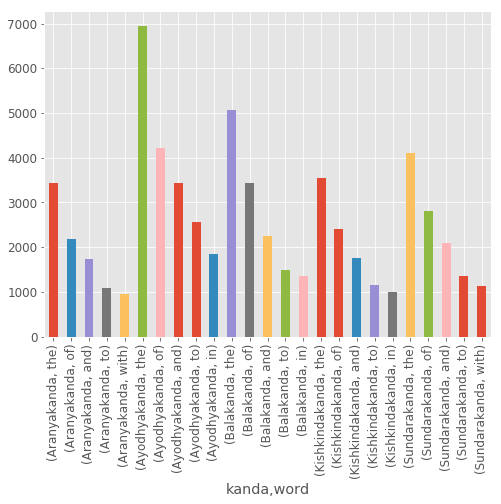

In [57]:
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['n_w'])